In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')

In [12]:
data.columns

Index(['MJD', 'orbit', 'rate', 'error', 'rateA', 'errorA', 'rateB', 'errorB',
       'rateC', 'errorC'],
      dtype='object')

In [13]:
data.MJD

0        50087.324737
1        50087.325848
2        50087.326958
3        50087.328070
4        50087.395662
5        50087.396774
6        50087.397884
7        50087.398996
8        50088.379922
9        50088.379922
10       50088.381032
11       50090.065929
12       50090.066982
13       50090.068035
14       50090.069088
15       50090.070141
16       50090.071195
17       50090.072248
18       50090.073301
19       50090.074355
20       50090.075408
21       50090.076461
22       50090.077514
23       50090.078567
24       50090.079620
25       50090.104921
26       50090.105975
27       50090.239308
28       50090.240361
29       50090.241414
             ...     
94038    55186.193978
94039    55186.513793
94040    55186.514904
94041    55187.100275
94042    55187.101386
94043    55187.342867
94044    55187.364534
94045    55187.430460
94046    55187.431582
94047    55187.476756
94048    55189.380089
94049    55189.456398
94050    55192.003793
94051    55192.004904
94052    5

<IPython.core.display.Javascript object>


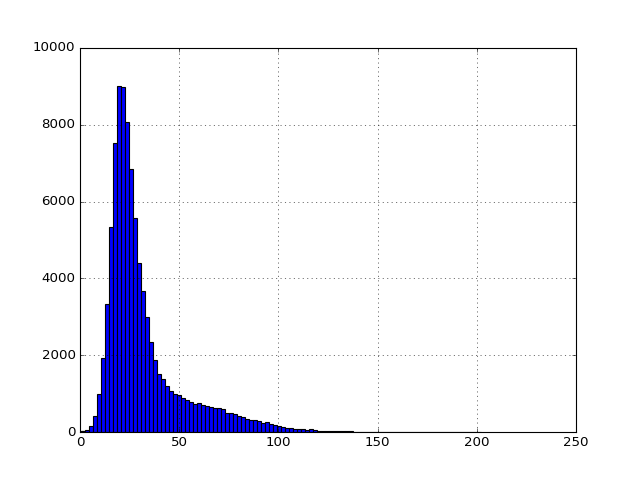

In [3]:
%matplotlib notebook
data.rate.hist(bins=100)

In [4]:
data_bla = data[data.rate < 100]

In [5]:
data_bla = data.copy()
data_bla = data_bla[(data_bla.rateA < 60) & (data_bla.rateB < 30) & (data_bla.rateC < 28)]

In [6]:
counts = data_bla[['rateA', 'rateB', 'rateC']].copy()

<IPython.core.display.Javascript object>


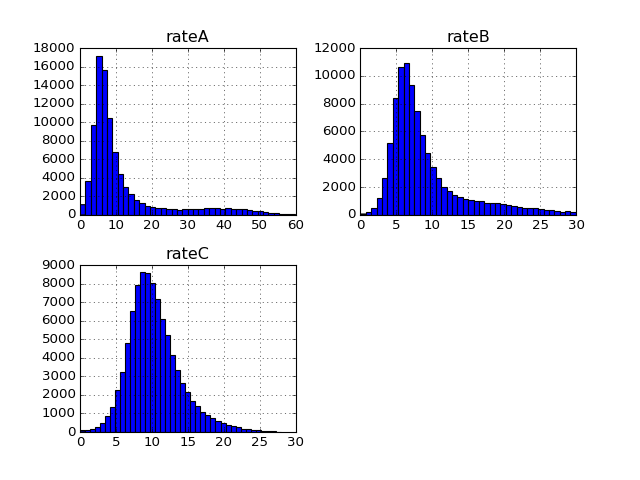

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc19ba16d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efc195f31d0>]], dtype=object)

In [7]:
counts.hist(bins=40)

In [60]:
counts['ratio'] = counts.rateB / (counts.rateA + counts.rateB + counts.rateC)

In [8]:
from pandas.tools.plotting import scatter_matrix

In [39]:
import numpy as np
data['state'] = np.NaN

<IPython.core.display.Javascript object>


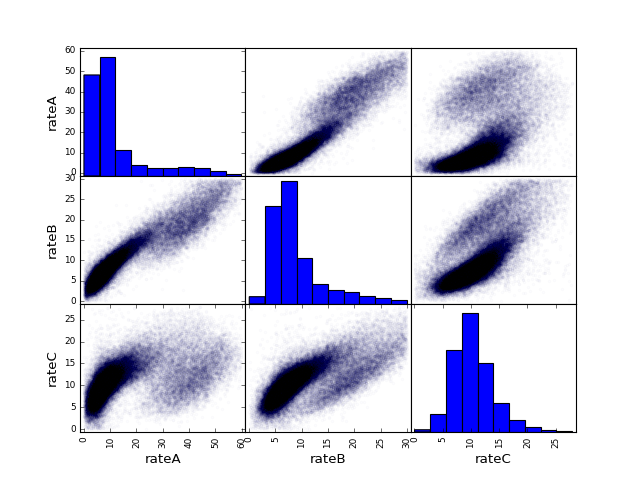

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc193b3828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efc1915f630>]], dtype=object)

In [9]:
scatter_matrix(counts, alpha=0.01)

<IPython.core.display.Javascript object>


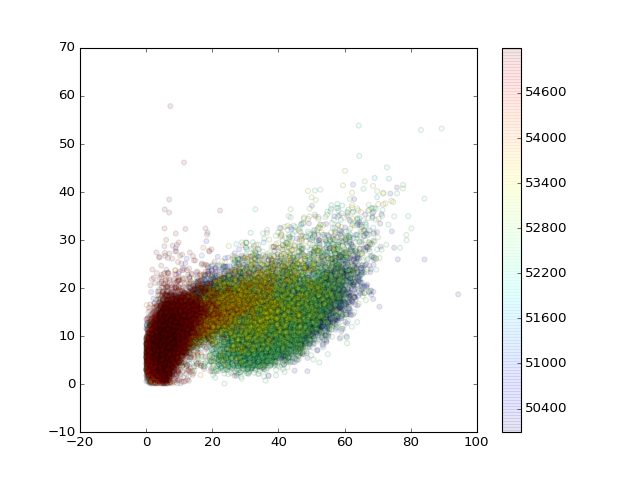

In [18]:
plt.figure()
plt.scatter(data.rateA, data.rateC, c=data.MJD, alpha=0.1)
plt.colorbar()

In [89]:
data.state[:] = np.NaN
data.state[(data.MJD < 52200) * (data.MJD > 52160)] = 0
data.state[data.MJD > 54000] = 1


/home/andy/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [90]:
data.state.value_counts()

1.0    20341
0.0     1126
Name: state, dtype: int64

<IPython.core.display.Javascript object>


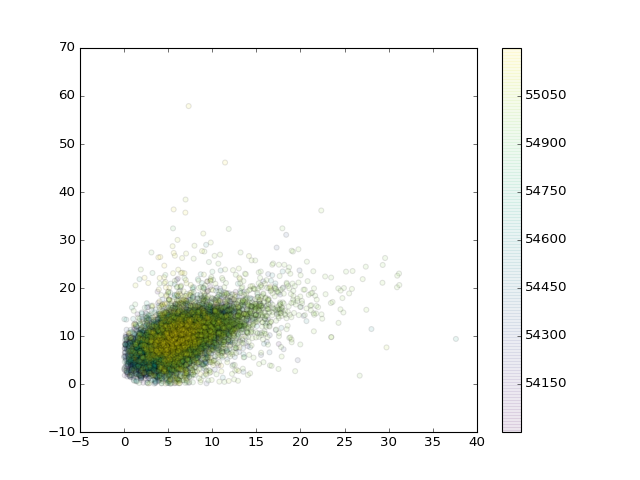

In [88]:
early = data[(data.MJD > 54000)]
plt.figure()
#plt.scatter(data.rateA, data.rateC, c='k', alpha=0.01)
plt.scatter(early.rateA, early.rateC, c=early.MJD, alpha=0.1, cmap='viridis')

plt.colorbar()

In [37]:
len(early)

1264

<IPython.core.display.Javascript object>


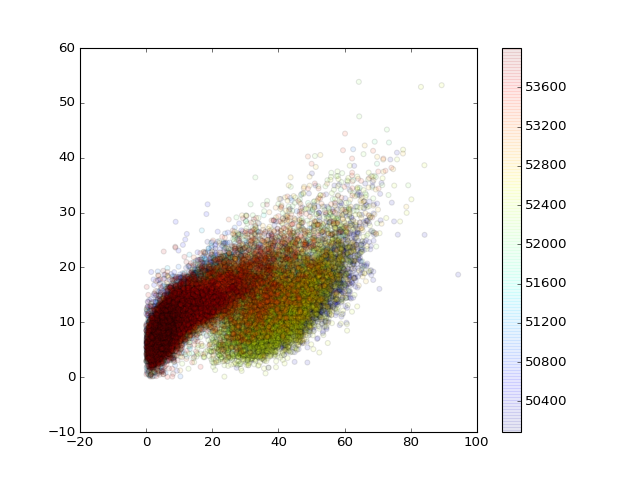

In [32]:
early = data[data.MJD < 54000]
plt.figure()
plt.scatter(early.rateA, early.rateC, c=early.MJD, alpha=0.1)
plt.colorbar()

In [26]:
len(early)

20341

In [33]:
len(data)

94068

In [28]:
counts.columns

Index(['rateA', 'rateB', 'rateC'], dtype='object')

In [29]:
counts_early = early[counts.columns]

In [30]:
from pandas.tools.plotting import andrews_curves

<IPython.core.display.Javascript object>


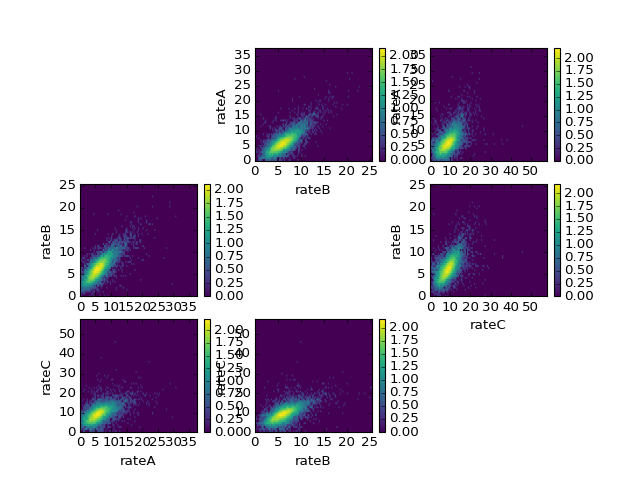

In [31]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(3, 3)
for ax, col in zip(axes, counts.columns):
    for axx, col2 in zip(ax, counts.columns):
        if col == col2:
            axx.set_visible(False)
        else:
            counts_early.plot.hexbin(x=col2, y=col, gridsize=100, ax=axx, bins="log", cmap='viridis')

<IPython.core.display.Javascript object>


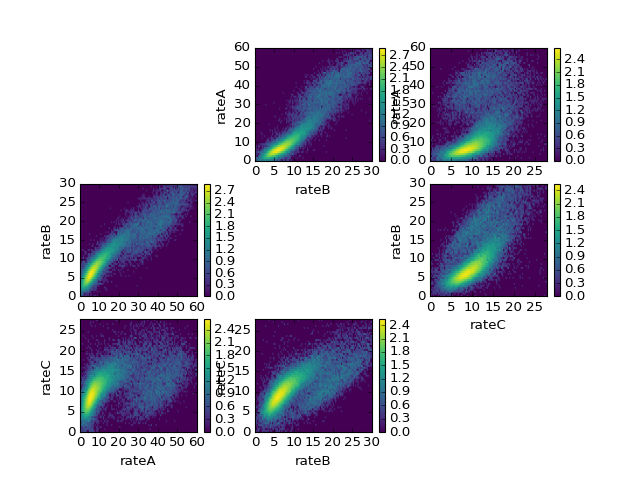

In [11]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(3, 3)
for ax, col in zip(axes, counts.columns):
    for axx, col2 in zip(ax, counts.columns):
        if col == col2:
            axx.set_visible(False)
        else:
            counts.plot.hexbin(x=col2, y=col, gridsize=100, ax=axx, bins="log", cmap='viridis')

<IPython.core.display.Javascript object>


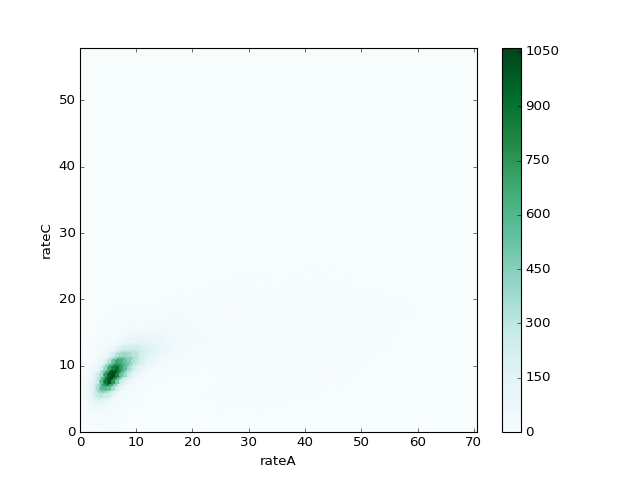

In [11]:
counts.plot.hexbin(x='rateA', y='rateC', gridsize=100)

<IPython.core.display.Javascript object>


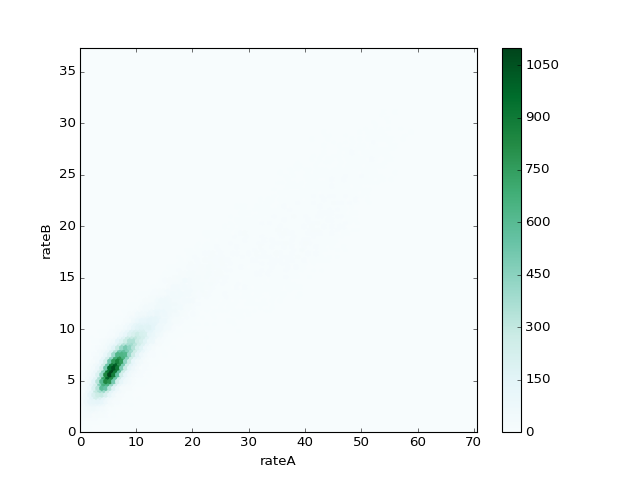

In [12]:
counts.plot.hexbin(x='rateA', y='rateB', gridsize=100)

In [13]:
data.max()

MJD       55198.926767
orbit         0.999980
rate        201.910000
error        11.130000
rateA        94.360000
errorA       12.470000
rateB        69.640000
errorB        5.820000
rateC        57.900000
errorC       34.670000
dtype: float64

In [14]:
counts.max()

rateA    70.54
rateB    37.33
rateC    57.90
dtype: float64

In [15]:
counts.min()

rateA    0.01
rateB    0.02
rateC    0.03
dtype: float64

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA()
X = pca.fit_transform(counts[['rateA', 'rateB', 'rateC']])

In [18]:
pca.explained_variance_

array([ 170.71338115,   10.52583161,    1.36928084])

In [19]:
pca.components_

array([[ 0.89841901,  0.40254084,  0.17551114],
       [-0.31848563,  0.32210707,  0.89152338],
       [ 0.30234119, -0.85685933,  0.41759059]])

<IPython.core.display.Javascript object>


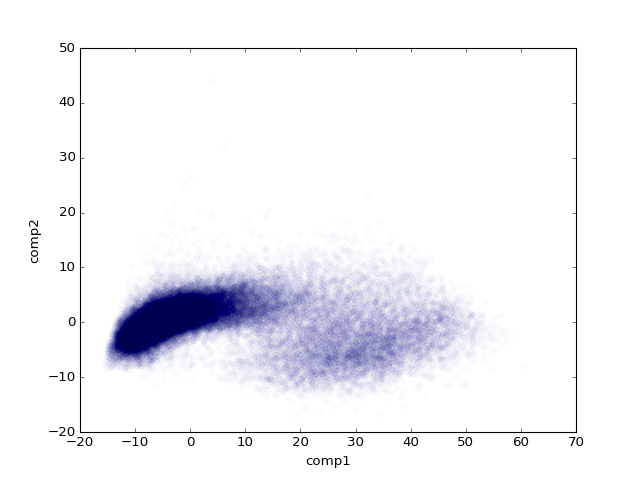

In [20]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], alpha=0.01)
plt.xlabel("comp1")
plt.ylabel("comp2")

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


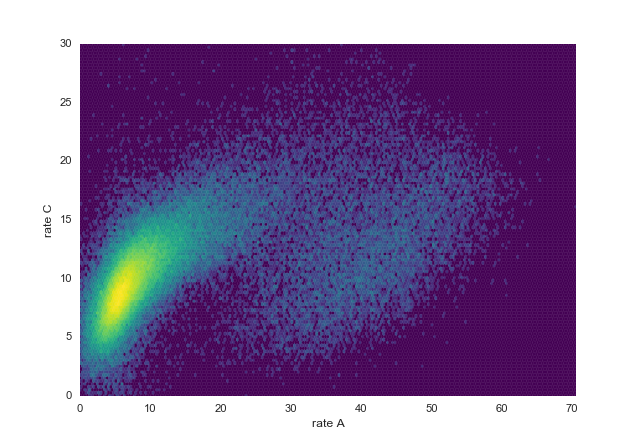

In [204]:
plt.figure()
plt.hexbin(counts.rateA, counts.rateC, cmap="viridis", gridsize=200, bins="log")
#plt.xlim(0, 20)
plt.xlabel("rate A")
plt.ylim(0, 30)
plt.ylabel("rate C")
plt.savefig("rateArateC_hex_log")

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


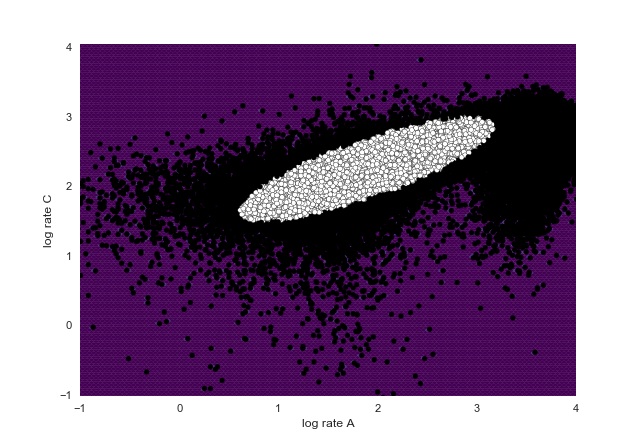

In [208]:
plt.figure()
plt.hexbin(np.log(counts.rateA), np.log(counts.rateC), cmap="viridis", gridsize=200, bins="log")
plt.xlim(-1, 4)
plt.xlabel("log rate A")
plt.ylim(-1, )
plt.ylabel("log rate C")
plt.savefig("log_rateA_log_rateC_hex_log")

<IPython.core.display.Javascript object>


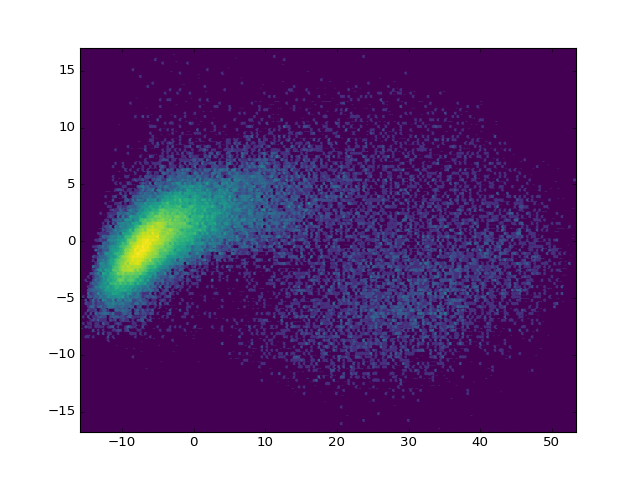

In [98]:
plt.figure()
plt.hexbin(X[:, 0], X[:, 1], bins="log", cmap="viridis", gridsize=200)

In [21]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


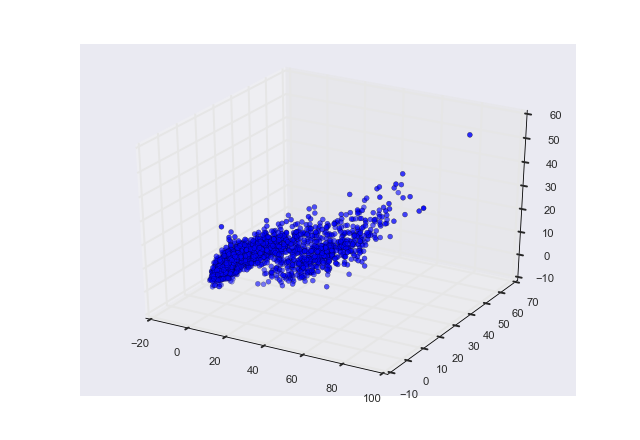

In [156]:
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')

threedee = plt.figure().gca(projection='3d')
bla = data[::20]
threedee.scatter(bla['rateA'], bla['rateB'], bla['rateC'])

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X = StandardScaler().fit_transform(counts[['rateA', 'rateB', 'rateC']])

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
ridge = LinearRegression().fit(counts[['rateA', 'rateC']], counts.rateB)

In [27]:
ridge.score(counts[['rateA', 'rateC']], counts.rateB)

0.93857008274727416

In [28]:
ridge.coef_

array([ 0.359822  ,  0.42709078])

In [29]:
ridge.intercept_

0.27498929511779657

In [30]:
plt.figure()
plt.hexbin(counts.rateA, counts.rateC, bins="log", cmap="viridis", gridsize=100)
plt.xlabel("rate A")
plt.ylabel("rate C")

<IPython.core.display.Javascript object>

In [31]:
import seaborn as sns

In [32]:
plt.figure()
bla = counts[::100]
sns.kdeplot(bla.rateA, bla.rateC, shade=True)

<IPython.core.display.Javascript object>

In [33]:
import numpy as np
from seaborn.distributions import _scipy_bivariate_kde
from six import string_types
import matplotlib.pyplot as mpl

def _bivariate_kdeplot(x, y, filled, fill_lowest,
                       kernel, bw, gridsize, cut, clip,
                       axlabel, ax, **kwargs):
    """Plot a joint KDE estimate as a bivariate contour plot."""
    # Determine the clipping
    if clip is None:
        clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
    elif np.ndim(clip) == 1:
        clip = [clip, clip]

    # Calculate the KDE
    if False:
        xx, yy, z = _statsmodels_bivariate_kde(x, y, bw, gridsize, cut, clip)
    else:
        xx, yy, z = _scipy_bivariate_kde(x, y, bw, gridsize, cut, clip)

    # Plot the contours
    n_levels = kwargs.pop("n_levels", 10)
    cmap = kwargs.get("cmap", "BuGn" if filled else "BuGn_d")
    if isinstance(cmap, string_types):
        if cmap.endswith("_d"):
            pal = ["#333333"]
            pal.extend(color_palette(cmap.replace("_d", "_r"), 2))
            cmap = blend_palette(pal, as_cmap=True)
        else:
            cmap = mpl.cm.get_cmap(cmap)

    kwargs["cmap"] = cmap
    contour_func = ax.contourf if filled else ax.contour
    cset = contour_func(xx, yy, z, n_levels, **kwargs)
    if filled and not fill_lowest:
        cset.collections[0].set_alpha(0)
    kwargs["n_levels"] = n_levels

    # Label the axes
    if hasattr(x, "name") and axlabel:
        ax.set_xlabel(x.name)
    if hasattr(y, "name") and axlabel:
        ax.set_ylabel(y.name)

    return ax, xx, yy, z

In [34]:
import numpy as np

In [35]:
def kdeplot(data, data2=None, shade=False, vertical=False, kernel="gau",
            bw="scott", gridsize=100, cut=3, clip=None, legend=True,
            cumulative=False, shade_lowest=True, ax=None, **kwargs):
    """Fit and plot a univariate or bivariate kernel density estimate.
    Parameters
    ----------
    data : 1d array-like
        Input data.
    data2: 1d array-like, optional
        Second input data. If present, a bivariate KDE will be estimated.
    shade : bool, optional
        If True, shade in the area under the KDE curve (or draw with filled
        contours when data is bivariate).
    vertical : bool, optional
        If True, density is on x-axis.
    kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
        Code for shape of kernel to fit with. Bivariate KDE can only use
        gaussian kernel.
    bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
        Name of reference method to determine kernel size, scalar factor,
        or scalar for each dimension of the bivariate plot.
    gridsize : int, optional
        Number of discrete points in the evaluation grid.
    cut : scalar, optional
        Draw the estimate to cut * bw from the extreme data points.
    clip : pair of scalars, or pair of pair of scalars, optional
        Lower and upper bounds for datapoints used to fit KDE. Can provide
        a pair of (low, high) bounds for bivariate plots.
    legend : bool, optional
        If True, add a legend or label the axes when possible.
    cumulative : bool, optional
        If True, draw the cumulative distribution estimated by the kde.
    shade_lowest : bool, optional
        If True, shade the lowest contour of a bivariate KDE plot. Not
        relevant when drawing a univariate plot or when ``shade=False``.
        Setting this to ``False`` can be useful when you want multiple
        densities on the same Axes.
    ax : matplotlib axis, optional
        Axis to plot on, otherwise uses current axis.
    kwargs : key, value pairings
        Other keyword arguments are passed to ``plt.plot()`` or
        ``plt.contour{f}`` depending on whether a univariate or bivariate
        plot is being drawn.
    Returns
    -------
    ax : matplotlib Axes
        Axes with plot.
    See Also
    --------
    distplot: Flexibly plot a univariate distribution of observations.
    jointplot: Plot a joint dataset with bivariate and marginal distributions.
    Examples
    --------
    Plot a basic univariate density:
    .. plot::
        :context: close-figs
        >>> import numpy as np; np.random.seed(10)
        >>> import seaborn as sns; sns.set(color_codes=True)
        >>> mean, cov = [0, 2], [(1, .5), (.5, 1)]
        >>> x, y = np.random.multivariate_normal(mean, cov, size=50).T
        >>> ax = sns.kdeplot(x)
    Shade under the density curve and use a different color:
    .. plot::
        :context: close-figs
        >>> ax = sns.kdeplot(x, shade=True, color="r")
    Plot a bivariate density:
    .. plot::
        :context: close-figs
        >>> ax = sns.kdeplot(x, y)
    Use filled contours:
    .. plot::
        :context: close-figs
        >>> ax = sns.kdeplot(x, y, shade=True)
    Use more contour levels and a different color palette:
    .. plot::
        :context: close-figs
        >>> ax = sns.kdeplot(x, y, n_levels=30, cmap="Purples_d")
    Use a narrower bandwith:
    .. plot::
        :context: close-figs
        >>> ax = sns.kdeplot(x, bw=.15)
    Plot the density on the vertical axis:
    .. plot::
        :context: close-figs
        >>> ax = sns.kdeplot(y, vertical=True)
    Limit the density curve within the range of the data:
    .. plot::
        :context: close-figs
        >>> ax = sns.kdeplot(x, cut=0)
    Plot two shaded bivariate densities:
    .. plot::
        :context: close-figs
        >>> iris = sns.load_dataset("iris")
        >>> setosa = iris.loc[iris.species == "setosa"]
        >>> virginica = iris.loc[iris.species == "virginica"]
        >>> ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
        ...                  cmap="Reds", shade=True, shade_lowest=False)
        >>> ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
        ...                  cmap="Blues", shade=True, shade_lowest=False)
    """
    if ax is None:
        ax = plt.gca()

    data = data.astype(np.float64)
    if data2 is not None:
        data2 = data2.astype(np.float64)

    bivariate = False
    if isinstance(data, np.ndarray) and np.ndim(data) > 1:
        bivariate = True
        x, y = data.T
    elif isinstance(data, pd.DataFrame) and np.ndim(data) > 1:
        bivariate = True
        x = data.iloc[:, 0].values
        y = data.iloc[:, 1].values
    elif data2 is not None:
        bivariate = True
        x = data
        y = data2

    if bivariate and cumulative:
        raise TypeError("Cumulative distribution plots are not"
                        "supported for bivariate distributions.")
    if bivariate:
        ax, xx, yy, z = _bivariate_kdeplot(x, y, shade, shade_lowest,
                                kernel, bw, gridsize, cut, clip, legend,
                                ax, **kwargs)
    else:
        ax = _univariate_kdeplot(data, shade, vertical, kernel, bw,
                                 gridsize, cut, clip, legend, ax,
                                 cumulative=cumulative, **kwargs)

    return ax, xx, yy, z


<IPython.core.display.Javascript object>


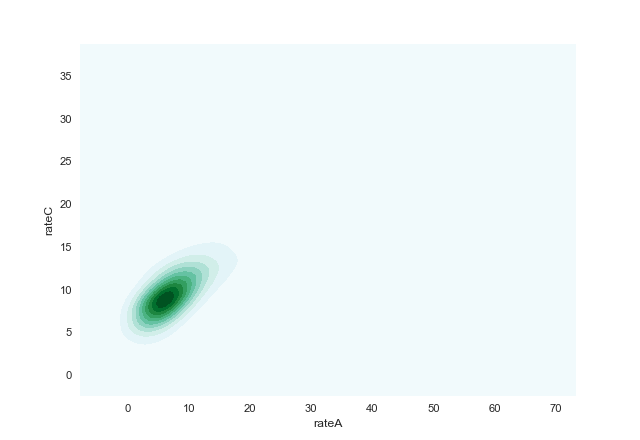

In [40]:
plt.figure()
bla = counts[::10]
ax, xx, yy, z = kdeplot(bla.rateA, bla.rateC, shade=True, bw='scott')

In [193]:
z.shape

(100, 100)

<IPython.core.display.Javascript object>


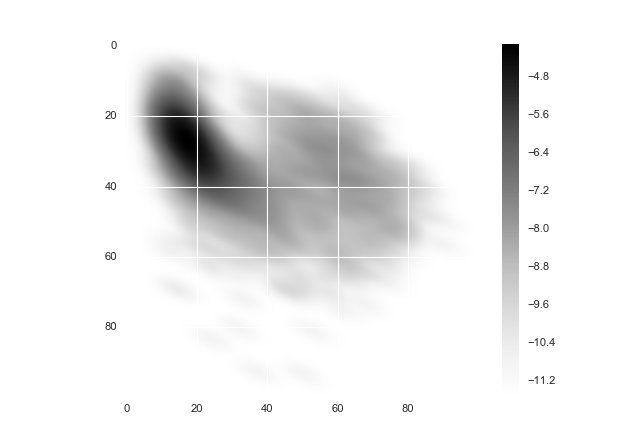

In [41]:
plt.figure()
plt.imshow(np.log(z + 0.00001))
plt.colorbar()

In [42]:
from sklearn.neighbors import KernelDensity

In [129]:
kde = KernelDensity(bandwidth=2).fit(counts[['rateA', 'rateC']])
aline = np.linspace(bla.rateA.min(), bla.rateA.max(), 100)
cline = np.linspace(bla.rateC.min(), bla.rateC.max(), 100)

A, C = np.meshgrid(aline, cline)

In [130]:
z = kde.score_samples(np.c_[A.ravel(), C.ravel()])

<IPython.core.display.Javascript object>


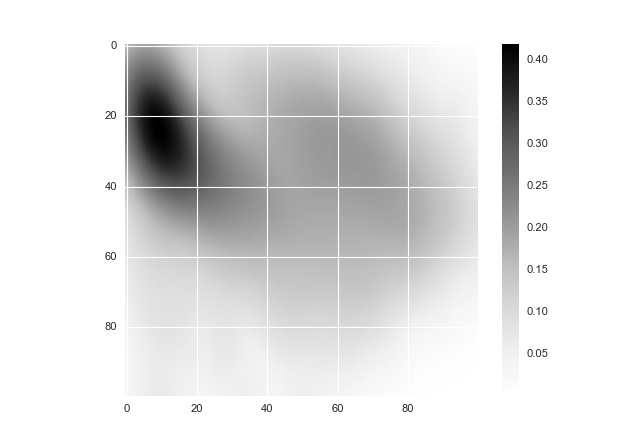

In [131]:
plt.figure()
plt.imshow(np.exp(z / 5).reshape(A.shape))
plt.colorbar()

<IPython.core.display.Javascript object>


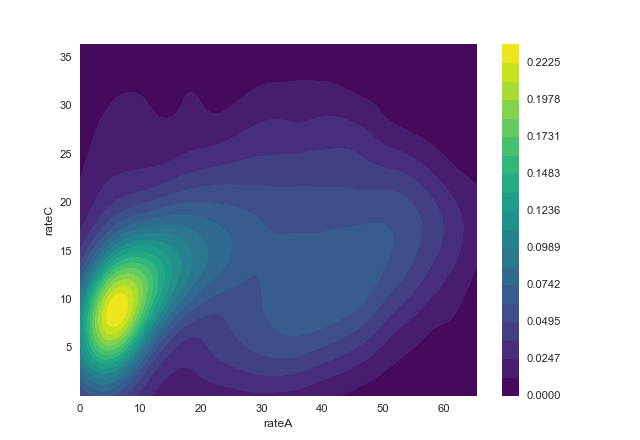

In [132]:
plt.figure(),
asdf = np.exp(z / 3).reshape(A.shape)
plt.contourf(A, C, asdf, cmap='viridis', levels=np.linspace(asdf.min(), asdf.max(), 20))
plt.colorbar()
plt.xlabel("rateA")
plt.ylabel("rateC")

<IPython.core.display.Javascript object>


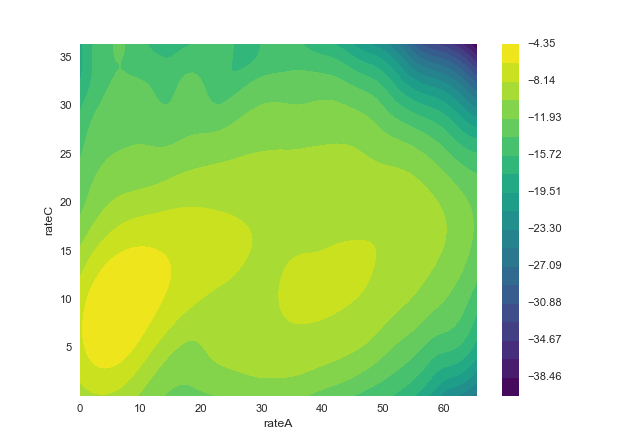

In [154]:
plt.figure(),
asdf = z.reshape(A.shape)
plt.contourf(A, C, asdf, cmap='viridis', levels=np.linspace(asdf.min(), asdf.max(), 20))
plt.colorbar()
plt.xlabel("rateA")
plt.ylabel("rateC")

In [ ]:
np.logspace()

In [155]:
pca = PCA(whiten=True)
X = pca.fit_transform(counts[['rateA', 'rateB', 'rateC']])

<IPython.core.display.Javascript object>


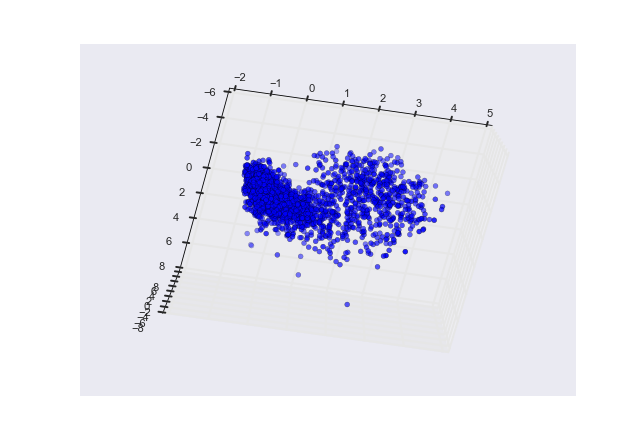

In [157]:
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')

threedee = plt.figure().gca(projection='3d')
bla = X[::20]
threedee.scatter(bla[:, 0], bla[:, 1], bla[:, 2])

<IPython.core.display.Javascript object>


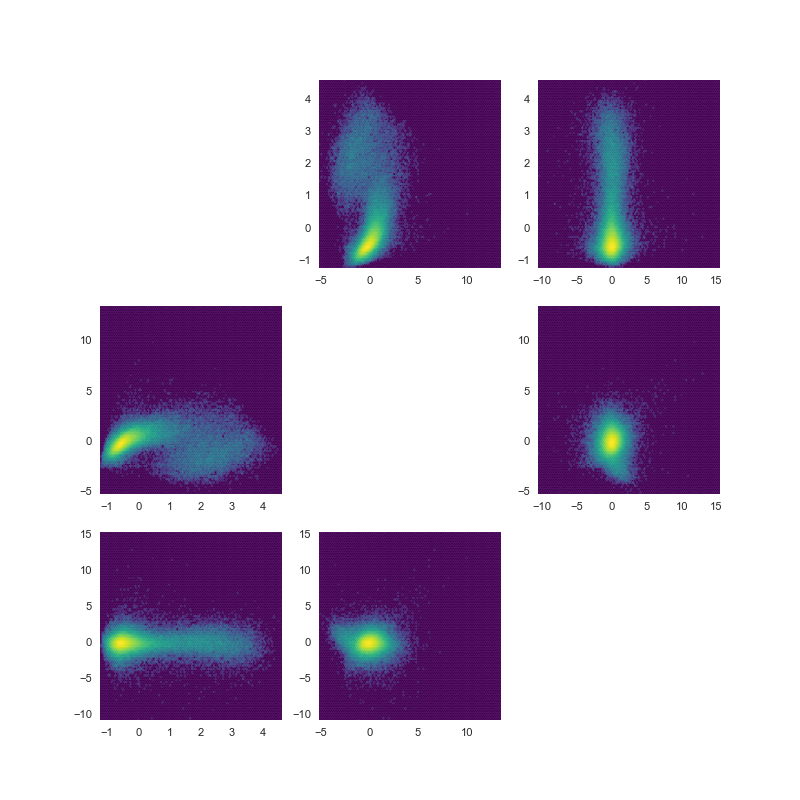

In [164]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(3, 3, figsize=(10, 10))
for col, ax in enumerate(axes):
    for col2, axx in enumerate(ax):
        if col == col2:
            axx.set_visible(False)
        else:
            axx.hexbin(X[:, col2], X[:, col], gridsize=100, bins="log", cmap='viridis')

In [167]:
pca = PCA()
X_ = pca.fit_transform(StandardScaler().fit_transform(counts[['rateA', 'rateB', 'rateC']]))

<IPython.core.display.Javascript object>


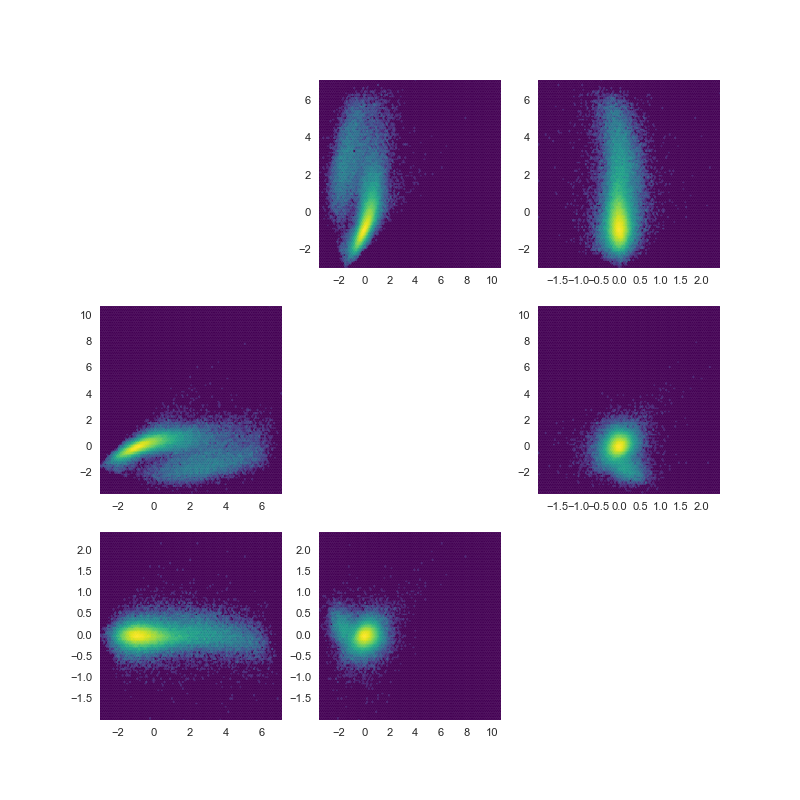

In [168]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(3, 3, figsize=(10, 10))
for col, ax in enumerate(axes):
    for col2, axx in enumerate(ax):
        if col == col2:
            axx.set_visible(False)
        else:
            axx.hexbin(X_[:, col2], X_[:, col], gridsize=100, bins="log", cmap='viridis')

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


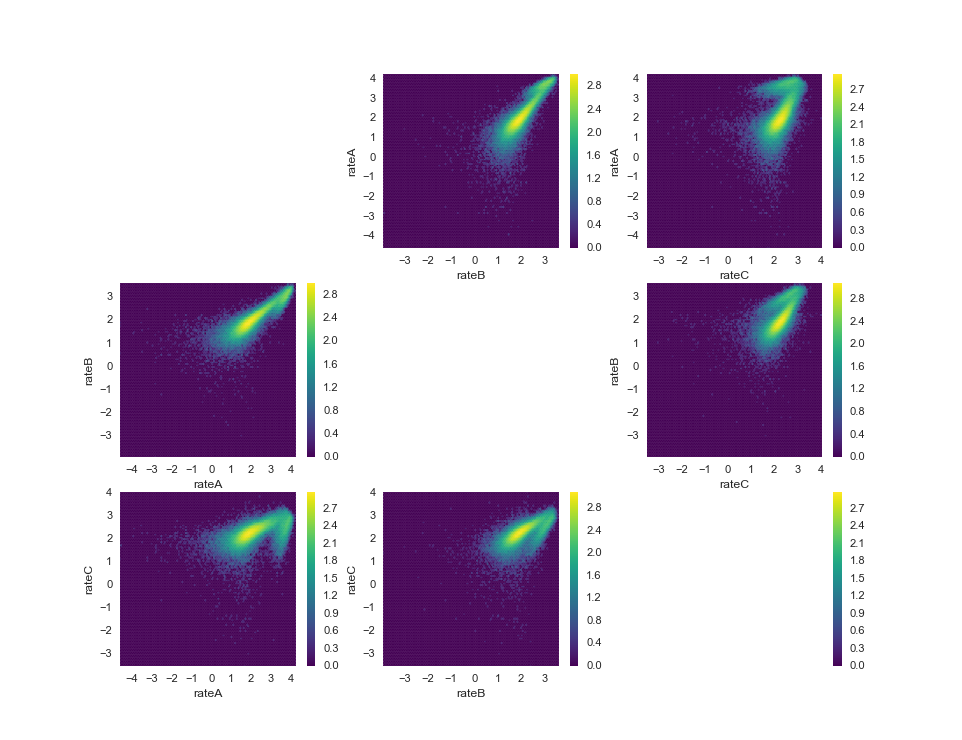

In [169]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(3, 3)
for ax, col in zip(axes, counts.columns):
    for axx, col2 in zip(ax, counts.columns):
        if col == col2:
            axx.set_visible(False)
        else:
            np.log(counts).plot.hexbin(x=col2, y=col, gridsize=100, ax=axx, bins="log", cmap='viridis')

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


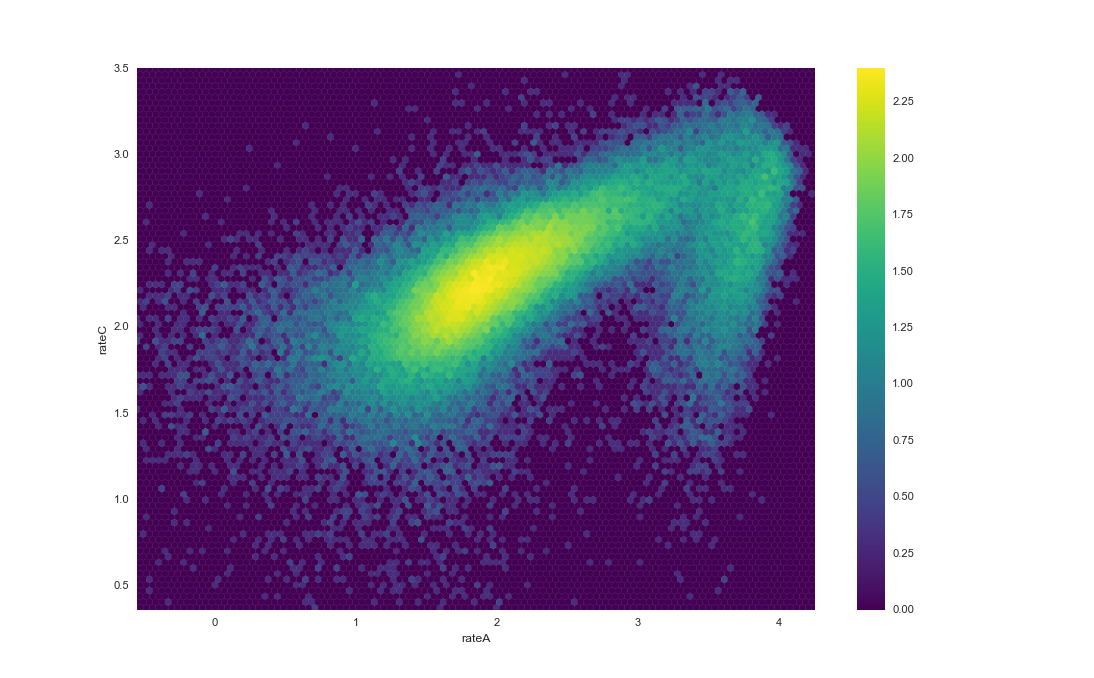

In [173]:
np.log(counts).plot.hexbin(x='rateA', y='rateC', gridsize=200, bins="log", cmap='viridis')

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


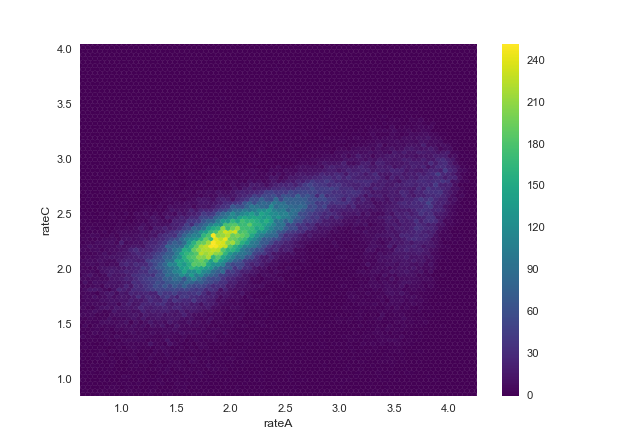

In [194]:
np.log(counts).plot.hexbin(x='rateA', y='rateC', gridsize=200, cmap='viridis')

In [179]:
logcounts = np.log(counts)
kde = KernelDensity(bandwidth=.1).fit(logcounts[['rateA', 'rateC']])
aline = np.linspace(logcounts.rateA.min(), logcounts.rateA.max(), 100)
cline = np.linspace(logcounts.rateC.min(), logcounts.rateC.max(), 100)

A, C = np.meshgrid(aline, cline)

In [180]:
z = kde.score_samples(np.c_[A.ravel(), C.ravel()])

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


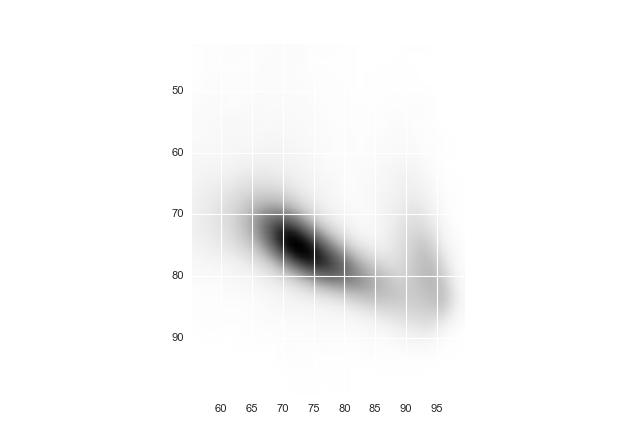

In [193]:
plt.figure()
plt.imshow(np.exp(0.5 * z).reshape(A.shape))

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


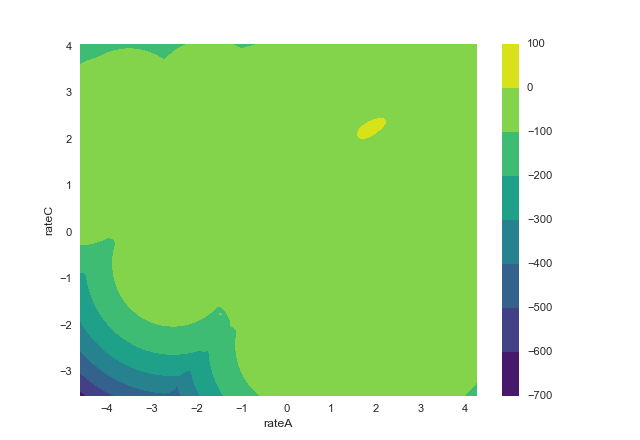

In [182]:
plt.figure()
asdf = z.reshape(A.shape)
plt.contourf(A, C, asdf, cmap='viridis') #, levels=np.linspace(asdf.min(), asdf.max(), 20))
plt.colorbar()
plt.xlabel("rateA")
plt.ylabel("rateC")

In [209]:
from sklearn.mixture import GaussianMixture

In [249]:
gmm = GaussianMixture(n_components=5, verbose=10, n_init=10, init_params="random").fit(logcounts[['rateA', 'rateC']])

Initialization 0
  Iteration 0	 time lapse 0.16000s	 ll change 0.00496
  Iteration 10	 time lapse 0.81344s	 ll change 0.00407
  Iteration 20	 time lapse 0.74070s	 ll change 0.00144
  Iteration 30	 time lapse 0.68519s	 ll change 0.00430
  Iteration 40	 time lapse 0.60526s	 ll change 0.00182
Initialization converged: True	 time lapse 3.18336s	 ll -1.04033
Initialization 1
  Iteration 0	 time lapse 0.13540s	 ll change 0.00849
  Iteration 10	 time lapse 0.60580s	 ll change 0.00526
  Iteration 20	 time lapse 0.61186s	 ll change 0.00191
  Iteration 30	 time lapse 0.61005s	 ll change 0.00181
  Iteration 40	 time lapse 0.61454s	 ll change 0.00490
Initialization converged: True	 time lapse 3.06408s	 ll -1.03879
Initialization 2
  Iteration 0	 time lapse 0.19074s	 ll change 0.00451
  Iteration 10	 time lapse 0.61570s	 ll change 0.00850
  Iteration 20	 time lapse 0.64484s	 ll change 0.00106
Initialization converged: True	 time lapse 1.51216s	 ll -1.11035
Initialization 3
  Iteration 0	 time lapse

In [250]:
gmm.weights_

array([ 0.1059811 ,  0.04325737,  0.31943557,  0.27212836,  0.2591976 ])

In [251]:
labels = gmm.predict(logcounts[['rateA', 'rateC']])

In [252]:
np.bincount(labels)

array([10447,  2716, 41639, 24179, 13940])

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


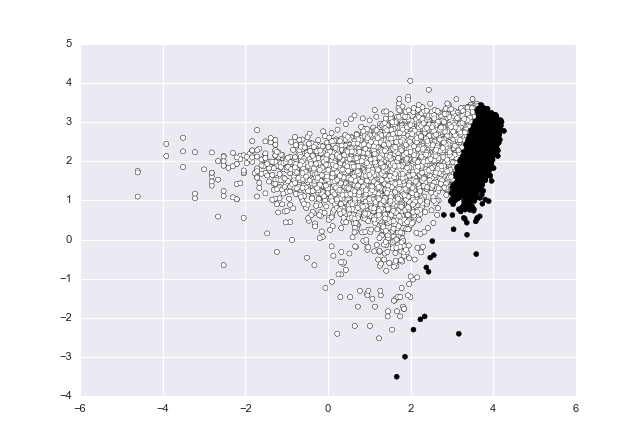

In [254]:
plt.figure()
plt.scatter(logcounts.rateA, logcounts.rateC, c=labels == 0)

In [255]:
from sklearn.linear_model import LogisticRegression

In [257]:
X = logcounts[['rateA', 'rateC']]
lr = LogisticRegression().fit(X, labels == 0)

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


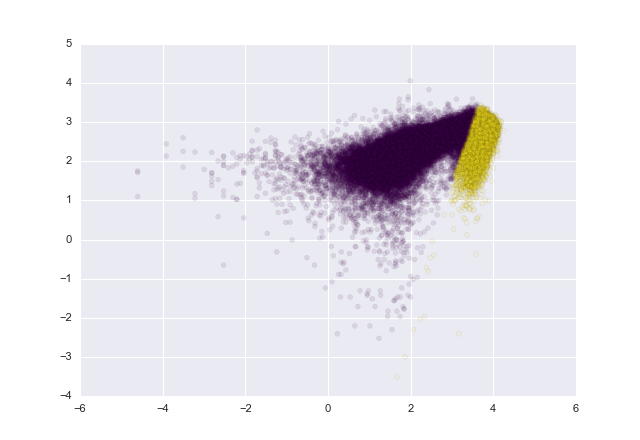

In [261]:
plt.figure()
plt.scatter(logcounts.rateA, logcounts.rateC, c=lr.predict(X), cmap='viridis', alpha=.1)

/home/andy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


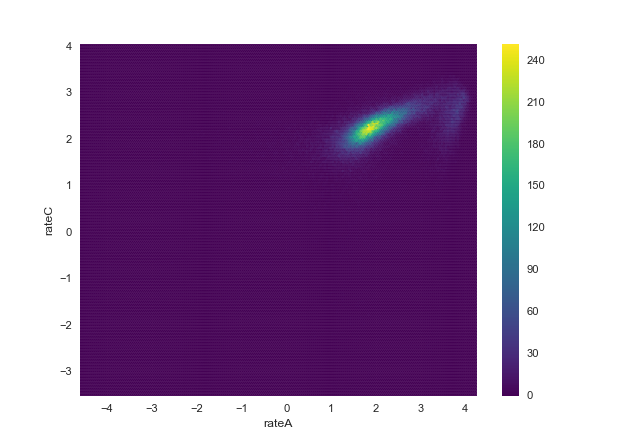

In [264]:
asdf = np.log(counts).plot.hexbin(x='rateA', y='rateC', gridsize=200, cmap='viridis')

In [266]:
asdf.ge

[]

In [80]:
data.state.value_counts()

1.0    91678
0.0     2390
Name: state, dtype: int64

In [91]:
grr = data[~np.isnan(data.state)]

In [104]:
from sklearn.linear_model import LogisticRegression
X = grr[['rateA', 'rateC']].values
lr = LogisticRegression().fit(X, grr.state)

<IPython.core.display.Javascript object>


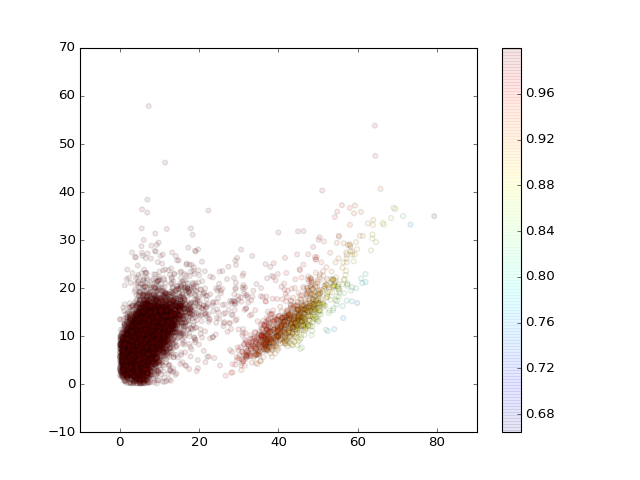

In [105]:
plt.figure()
plt.scatter(grr.rateA, grr.rateC, c=lr2.predict_proba(X)[:, 0], alpha=0.1)
plt.colorbar()

<IPython.core.display.Javascript object>


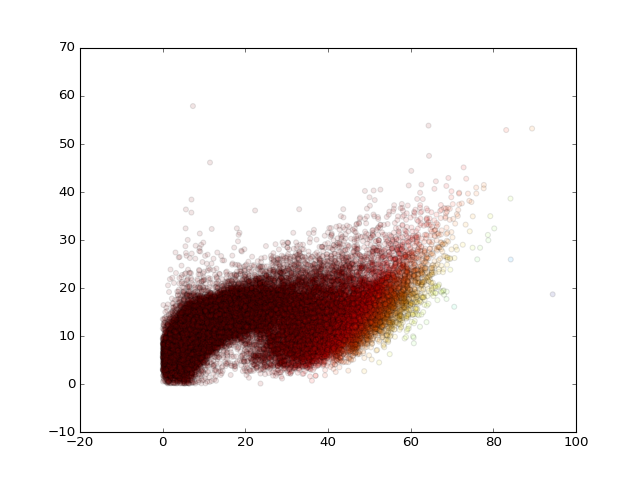

In [107]:
plt.figure()
plt.scatter(data.rateA, data.rateC, c=lr2.predict_proba(data[['rateA', 'rateC']])[:, 0], alpha=0.1)

<IPython.core.display.Javascript object>


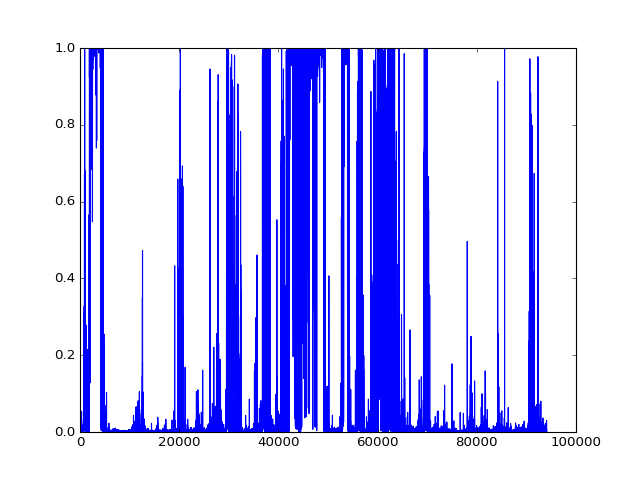

In [109]:
plt.figure()
plt.plot(lr.predict_proba(data[['rateA', 'rateC']])[:, 0])

In [101]:
X = data[['rateA', 'rateC']].values
lr2 = LogisticRegression().fit(X, data.state == 0)

<IPython.core.display.Javascript object>


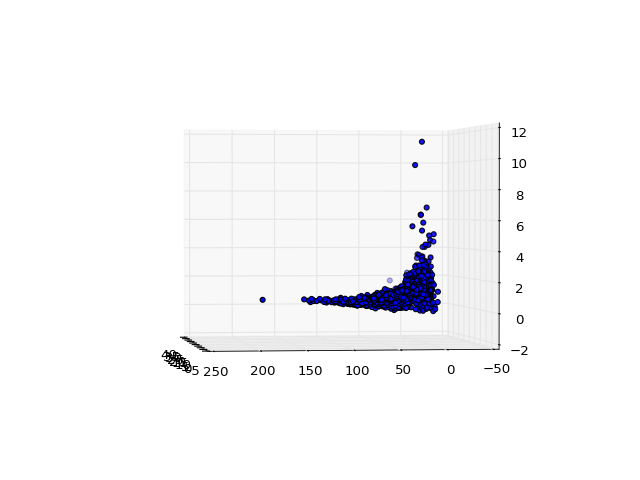

In [110]:
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')

threedee = plt.figure().gca(projection='3d')
bla = data[::20]
threedee.scatter(bla['rateC'] / bla['rateA'], bla['rate'], bla['rateC'] / bla['rateB'])

<IPython.core.display.Javascript object>


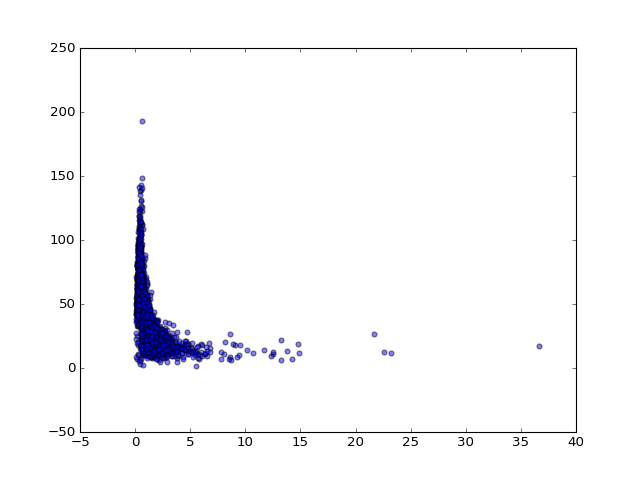

In [113]:
plt.figure()
plt.scatter(bla['rateC'] / bla['rateA'], bla['rate'], alpha=.5)

In [114]:
def mask(cola, colb, color=None, p1=99.9, p2=99.9):
    mask = (cola < np.percentile(cola, p1)) & (colb < np.percentile(colb, p2))
    if color is None:
        return cola[mask], colb[mask], None
    else:
        return cola[mask], colb[mask], color[mask]


In [116]:
x, y, _ = mask(bla['rateC'] / bla['rateA'], bla['rate'])

<IPython.core.display.Javascript object>


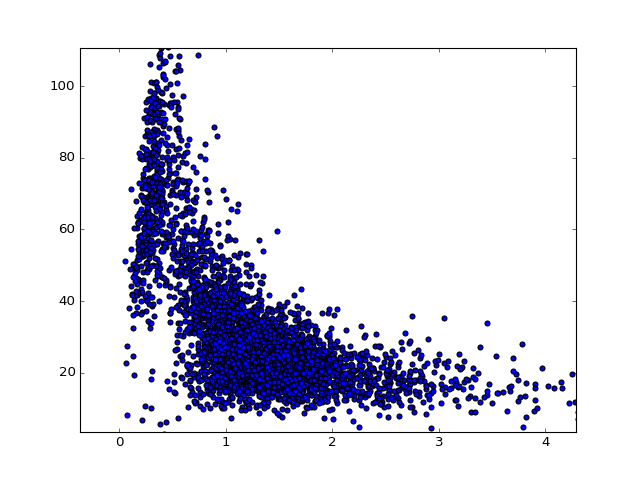

In [117]:
plt.figure()
plt.scatter(x, y)